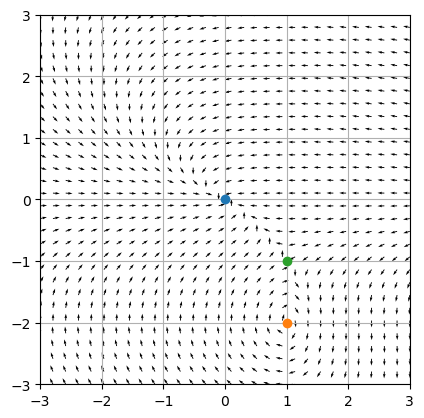

 0,0 is stable; 1,-1 unstable; 1,-2 asymptotically stable


In [9]:
import numpy as np
import matplotlib.pyplot as plt
# plot boundary
l = -3
L = 3
# number of grid points to plot in each direction
n = 30
xx = np.linspace(l, L, num=n)
yy = np.linspace(l, L, num=n)
x, y = np.meshgrid(xx, yy)
# computing F(x)
u =  -(2 + y)*(x+y)
v = -y * (1 - x)
# normalize u, v to have constant arrow length
norm = np.sqrt(u**2 + v**2)
norm[norm == 0] = 1
u /= norm
v /= norm
# plotting the direction field
plt.quiver(x, y, u, v)
# critical points
plt.plot(0, 0, 'o')
plt.plot(1, -2, 'o')
plt.plot(1, -1, 'o')

# plot properties
plt.axis('scaled')
plt.grid()
plt.xlim(l,L)
plt.ylim(l,L)

plt.show()
print(" 0,0 is stable; 1,-1 unstable; 1,-2 asymptotically stable")

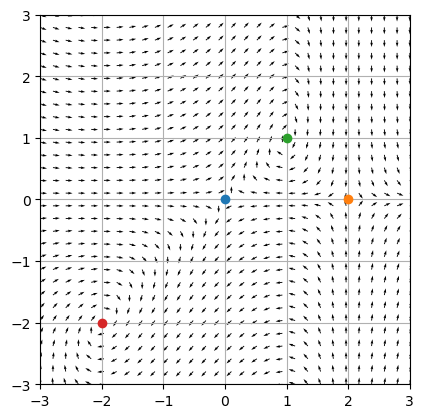

0,0 unstable, 1,1 and -2,-2 are asymptotically stable, 2,0 is unstable


In [10]:
import numpy as np
import matplotlib.pyplot as plt
# plot boundary
l = -3
L = 3
# number of grid points to plot in each direction
n = 30
xx = np.linspace(l, L, num=n)
yy = np.linspace(l, L, num=n)
x, y = np.meshgrid(xx, yy)
# computing F(x)
u = (2 - x)*(y - x)
v = y * ( 2 - x - x**2)
# normalize u, v to have constant arrow length
norm = np.sqrt(u**2 + v**2)
norm[norm == 0] = 1
u /= norm
v /= norm
# plotting the direction field
plt.quiver(x, y, u, v)
# critical points
plt.plot(0, 0, 'o')
plt.plot(2, 0, 'o')
plt.plot(1, 1, 'o')
plt.plot(-2, -2, 'o')
# plot properties
plt.axis('scaled')
plt.grid()
plt.xlim(l,L)
plt.ylim(l,L)
plt.show()
print("0,0 unstable, 1,1 and -2,-2 are asymptotically stable, 2,0 is unstable")

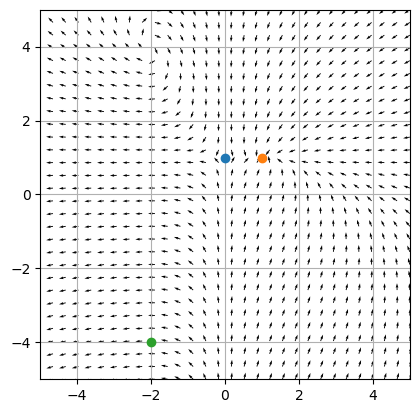

1,0 is unstable, 1,1 is stable, -2,-4 is unstable


In [12]:
import numpy as np
import matplotlib.pyplot as plt
# plot boundary
l = -5
L = 5
# number of grid points to plot in each direction
n = 30
xx = np.linspace(l, L, num=n)
yy = np.linspace(l, L, num=n)
x, y = np.meshgrid(xx, yy)
# computing F(x)
u = x * ( 2 - x - y)
v = (1-y)*(2 + x)
# normalize u, v to have constant arrow length
norm = np.sqrt(u**2 + v**2)
norm[norm == 0] = 1
u /= norm
v /= norm
# plotting the direction field
plt.quiver(x, y, u, v)
# critical points
plt.plot(0, 1, 'o')
plt.plot(1, 1, 'o')
plt.plot(-2, -4, 'o')
# plot properties
plt.axis('scaled')
plt.grid()
plt.xlim(l,L)
plt.ylim(l,L)
plt.show()
print("1,0 is unstable, 1,1 is stable, -2,-4 is unstable")

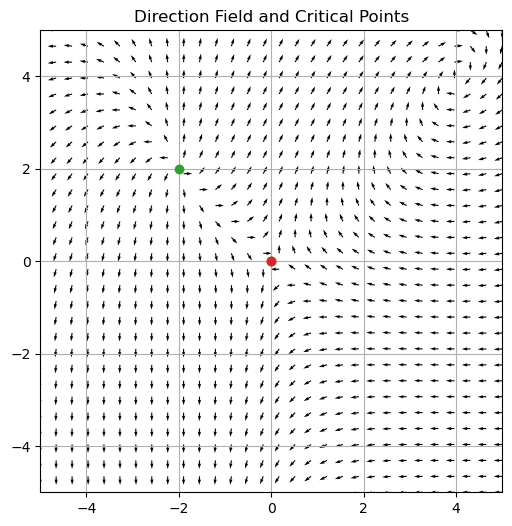

At critical point [0. 0.]:
Jacobian matrix:
[[-2.  2.]
 [ 4.  4.]]
Eigenvalues:
[-3.12310563  5.12310563]
----------------------------------------
At critical point [0. 0.]:
Jacobian matrix:
[[-2.  2.]
 [ 4.  4.]]
Eigenvalues:
[-3.12310563  5.12310563]
----------------------------------------
At critical point [-2.  2.]:
Jacobian matrix:
[[ 4.00000000e+00 -7.47846229e-13]
 [ 6.00000000e+00  6.00000000e+00]]
Eigenvalues:
[4. 6.]
----------------------------------------
At critical point [0. 0.]:
Jacobian matrix:
[[-2.  2.]
 [ 4.  4.]]
Eigenvalues:
[-3.12310563  5.12310563]
----------------------------------------


In [13]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# System definition
def f(x, y):
    u = (2 + x) * (y - x)
    v = (4 - x) * (y + x)
    return np.array([u, v])

# Jacobian computation
def jacobian(x, y, h=1e-5):
    fx = (f(x + h, y) - f(x - h, y)) / (2*h)
    fy = (f(x, y + h) - f(x, y - h)) / (2*h)
    return np.column_stack((fx, fy))

# Plot boundary
L = 5
n = 30
xx = np.linspace(-L, L, num=n)
yy = np.linspace(-L, L, num=n)
x, y = np.meshgrid(xx, yy)

# Compute direction field
u = (2 + x) * (y - x)
v = (4 - x) * (y + x)
norm = np.sqrt(u**2 + v**2)
norm[norm == 0] = 1
u /= norm
v /= norm

# Plot direction field
plt.figure(figsize=(10,6))
plt.quiver(x, y, u, v)

# Find critical points
guesses = [
    (0, 0),
    (0, 1),
    (-2, -2),
    (3, -2)
]
critical_points = []
for guess in guesses:
    sol = fsolve(lambda X: f(X[0], X[1]), guess)
    critical_points.append(sol)

critical_points = np.array(critical_points)

# Plot critical points
for point in critical_points:
    plt.plot(point[0], point[1], 'o')

plt.axis('scaled')
plt.grid()
plt.xlim(-L, L)
plt.ylim(-L, L)
plt.title('Direction Field and Critical Points')
plt.show()

# Linearization at critical points
for point in critical_points:
    J = jacobian(point[0], point[1])
    eigvals = np.linalg.eigvals(J)
    print(f"At critical point {point}:")
    print("Jacobian matrix:")
    print(J)
    print("Eigenvalues:")
    print(eigvals)
    print("-"*40)


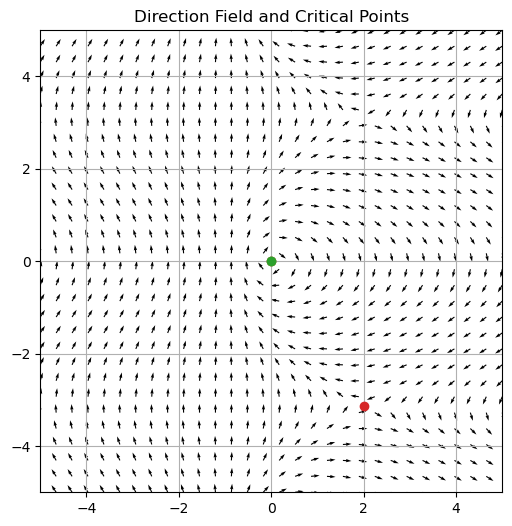

At critical point [0. 0.]:
Jacobian matrix:
[[ 0.  1.]
 [-1.  0.]]
Eigenvalues:
[0.+1.j 0.-1.j]
----------------------------------------
At critical point [-5.04778153e-17 -1.06910588e-50]:
Jacobian matrix:
[[-1.06910588e-50  1.00000000e+00]
 [-1.00000000e+00  0.00000000e+00]]
Eigenvalues:
[-5.34552942e-51+1.j -5.34552942e-51-1.j]
----------------------------------------
At critical point [3.54694229e-17 0.00000000e+00]:
Jacobian matrix:
[[ 0.  1.]
 [-1.  0.]]
Eigenvalues:
[0.+1.j 0.-1.j]
----------------------------------------
At critical point [ 2.         -3.14159265]:
Jacobian matrix:
[[ 2.61890169e-13 -3.00000000e+00]
 [-1.00000000e+00  0.00000000e+00]]
Eigenvalues:
[ 1.73205081 -1.73205081]
----------------------------------------


In [14]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# System definition
def f(x, y):
    u = (1+x)*np.sin(y)
    v = 1 - x - np.cos(y)
    return np.array([u, v])

# Jacobian computation
def jacobian(x, y, h=1e-5):
    fx = (f(x + h, y) - f(x - h, y)) / (2*h)
    fy = (f(x, y + h) - f(x, y - h)) / (2*h)
    return np.column_stack((fx, fy))

# Plot boundary
L = 5
n = 30
xx = np.linspace(-L, L, num=n)
yy = np.linspace(-L, L, num=n)
x, y = np.meshgrid(xx, yy)

# Compute direction field
u = (1+x)*np.sin(y)
v = 1 - x - np.cos(y)
norm = np.sqrt(u**2 + v**2)
norm[norm == 0] = 1
u /= norm
v /= norm

# Plot direction field
plt.figure(figsize=(10,6))
plt.quiver(x, y, u, v)

# Find critical points
guesses = [
    (0, 0),
    (0, 1),
    (-2, -2),
    (3, -2)
]
critical_points = []
for guess in guesses:
    sol = fsolve(lambda X: f(X[0], X[1]), guess)
    critical_points.append(sol)

critical_points = np.array(critical_points)

# Plot critical points
for point in critical_points:
    plt.plot(point[0], point[1], 'o')

plt.axis('scaled')
plt.grid()
plt.xlim(-L, L)
plt.ylim(-L, L)
plt.title('Direction Field and Critical Points')
plt.show()

# Linearization at critical points
for point in critical_points:
    J = jacobian(point[0], point[1])
    eigvals = np.linalg.eigvals(J)
    print(f"At critical point {point}:")
    print("Jacobian matrix:")
    print(J)
    print("Eigenvalues:")
    print(eigvals)
    print("-"*40)


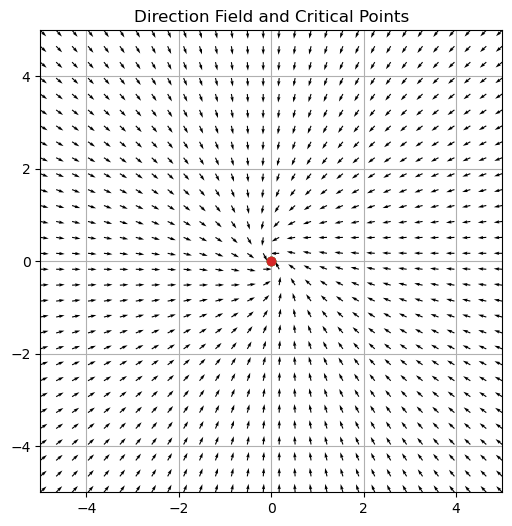

At critical point [0. 0.]:
Jacobian matrix:
[[-2. -1.]
 [ 1. -1.]]
Eigenvalues:
[-1.5+0.8660254j -1.5-0.8660254j]
----------------------------------------
At critical point [0. 0.]:
Jacobian matrix:
[[-2. -1.]
 [ 1. -1.]]
Eigenvalues:
[-1.5+0.8660254j -1.5-0.8660254j]
----------------------------------------
At critical point [0. 0.]:
Jacobian matrix:
[[-2. -1.]
 [ 1. -1.]]
Eigenvalues:
[-1.5+0.8660254j -1.5-0.8660254j]
----------------------------------------
At critical point [0. 0.]:
Jacobian matrix:
[[-2. -1.]
 [ 1. -1.]]
Eigenvalues:
[-1.5+0.8660254j -1.5-0.8660254j]
----------------------------------------


In [16]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# System definition
def f(x, y):
    u = -2*x-y-x*((x**2) + (y**2))
    v = x-y-y*((x**2) + (y**2))
    return np.array([u, v])

# Jacobian computation
def jacobian(x, y, h=1e-5):
    fx = (f(x + h, y) - f(x - h, y)) / (2*h)
    fy = (f(x, y + h) - f(x, y - h)) / (2*h)
    return np.column_stack((fx, fy))

# Plot boundary
L = 5
n = 30
xx = np.linspace(-L, L, num=n)
yy = np.linspace(-L, L, num=n)
x, y = np.meshgrid(xx, yy)

# Compute direction field
u = -2*x-y-x*((x**2) + (y**2))
v = x-y-y*((x**2) + (y**2))
norm = np.sqrt(u**2 + v**2)
norm[norm == 0] = 1
u /= norm
v /= norm

# Plot direction field
plt.figure(figsize=(10,6))
plt.quiver(x, y, u, v)

# Find critical points
guesses = [
    (0, 0),
    (0, 1),
    (-2, -2),
    (3, -2)
]
critical_points = []
for guess in guesses:
    sol = fsolve(lambda X: f(X[0], X[1]), guess)
    critical_points.append(sol)

critical_points = np.array(critical_points)

# Plot critical points
for point in critical_points:
    plt.plot(point[0], point[1], 'o')

plt.axis('scaled')
plt.grid()
plt.xlim(-L, L)
plt.ylim(-L, L)
plt.title('Direction Field and Critical Points')
plt.show()

# Linearization at critical points
for point in critical_points:
    J = jacobian(point[0], point[1])
    eigvals = np.linalg.eigvals(J)
    print(f"At critical point {point}:")
    print("Jacobian matrix:")
    print(J)
    print("Eigenvalues:")
    print(eigvals)
    print("-"*40)
